<a href="https://colab.research.google.com/github/luciabarg/datos_tumoresferas/blob/main/G1/1_AyVD_Clasif_Tumoresferas_G1_revision_Lu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
#### **Práctico de Análisis Exploratorio y Visualización**



### Descripción de los datos:

Se tratan de datos procesados en el [Grupo de Materia Condensada](https://ri.conicet.gov.ar/handle/11336/102) (FaMAF-UNC, IFEG-CONICET) en colaboración con el Laboratorio de Células Madre del [IBYME-CONICET](https://www.ibyme.org.ar/laboratorios/49/celulas-madre) a partir de imágenes tomadas usando un microscopio óptico invertido común.


Para extraer la información estructurada a partir de las imágenes se hizo uso del programa Fiji, que es un paquete de procesamiento de imágenes, distribución muy completa del programa [ImageJ](https://www.medicinatv.com/profesional/reportajes/una-plataforma-abierta-revoluciona-el-procesamiento-de-imagenes-biomedicas-4596/), que es ampliamente utilizado para procesar
imágenes médicas.

De acuerdo a la documentación del programa,
es posible contar y medir objetos si conocemos la escala en la cual se han
llevado a cabo dichas imágenes, en este caso, a cuántos $\mu$m equivale un
píxel.
Para llevar a cabo el procedimiento detallado en la [documentación](https://imagej.nih.gov/ij/docs/guide/146-30.html#sub:Analyze-Particles...),
es necesario contar con una imagen umbralizada.

Se realizó este procedimiento en las 91 imágenes disponibles y se etiquetaron en *esferoides* 'si' y 'no' de acuerdo al criterio de un [experto](https://www.conicet.gov.ar/new_scp/detalle.php?id=43977&datos_academicos=yes), obteniendo 1018 datos.



Importamos las librerías necesarias


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib
import matplotlib.pyplot as plt
sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import kurtosis
import scipy.stats
import math

# Ejemplo de una de las imágenes umbralizadas:
from IPython.display import Image


# por si quieren ver los distintos formatos:
# https://datavizpyr.com/seaborn-set_context-to-adjust-size-of-plot-labels-and-lines/
# https://seaborn.pydata.org/generated/seaborn.set_context.html


url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
fiji_datos_original = pd.read_csv(url)
fiji_datos_original 

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,1129.2718,102.2051,1129.2718,102.2051,67.3603,1118.8859,92.3913,21.0598,...,157,23.4287,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,1517.5528,126.1022,1517.5528,126.1022,82.8004,1504.7554,113.4511,25.8152,...,192,16.1443,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,1314.2815,126.0988,1314.2815,126.0988,62.1586,1304.3478,116.8478,19.7011,...,189,15.4222,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,1189.2841,212.6155,1189.2841,212.6155,84.5571,1175.9511,200.4076,26.4946,...,309,174.1440,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,1043.0782,247.7667,1043.0782,247.7667,82.0728,1030.5707,235.7337,25.1359,...,353,143.4270,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Esferas_BT474_dia_7_well_2_100X_5_blob_2,539.0477,534.6299,153.9304,534.6299,153.9304,87.0414,521.7391,139.2663,25.1359,...,205,105.9454,25.1359,1.1762,0.8502,0.9570,no,7,27.40515,3.335248
1014,Esferas_BT474_dia_7_well_2_100X_5_blob_4,277.8311,195.4265,433.4826,195.4265,433.4826,62.5566,185.4620,424.5924,18.3424,...,627,128.6598,18.1132,1.2288,0.8138,0.9473,no,7,19.93145,1.283064
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,...,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
1016,Esferas_BT474_dia_7_well_2_100X_6_blob_3,531.2020,58.4620,261.9482,58.4620,261.9482,89.5939,44.8370,248.6413,26.4946,...,399,34.3803,24.9780,1.2569,0.7956,0.9350,no,7,28.12875,3.606474


## Datos


Cargamos los datos de los experimentos realizados desde el día cero al séptimo.


Ya se encuentran las etiquetas y el valor de las poblaciones celulares estimadas en cada esferoide.

#### Descripción de las columnas:

   * **labels** (*'nombre_id'*): etiqueta que indica la estructura segmentada seleccionada.
   * **Area** (*'area'*): columna que indica el área de selección en $\mu$m$^2$.
   * **Perim.** (*'perimetro'*): Es la longitud  del límite exterior de la selección.
   * **Width** (*'ancho'*) y **Height** (*'altura'*): Es el ancho y la altura del rectángulo mas pequeño que encierra la estructura seleccionada.
   * **Circ.** (*'circulalidad'*): Indica la *circularidad*. Se calcula como 4π × [Area]/[Perimeter]$^2$, que con un valor de 1.0 indica un círculo perfecto. A medida que se acerca a 0.0, indica una forma cada vez más alargada.
   * Columnas del diámetro de Feret:
       * **Feret** (*feret*): Indica la distancia más larga entre dos puntos a lo largo del límite de selección.
       * **MinFeret** (*min_feret*): Indica la distancia mínima entre dos puntos a lo largo del límite de selección.
       * **FeretAngle**: Indica el ángulo del diámetro de Feret.
       * **FeretX** y **FeretY**: son las coordenadas iniciales del diámetro de Feret.
       * **AR** (*razon_aspecto*): Indica la  razón de aspecto de la elipse ajustada de la estructura seleccionada, es decir, [Eje mayor]/[Eje menor].
       * **Round** (*redondez*): Se calcula como  (4 × [Area] )/ (π × [Major axis]^2) o como la inversa de **AR**. Tiene un rango entre 0 y 1, con 1 indicando un círculo perfecto.
       * **Solidity**: Se calcula como [Area]/[Convex area]. Se calcula el área convexa como el área de una banda elástica envuelta firmemente alrededor de los puntos que definen la selección.
       * **Esferoide** (*esferoide*): etiqueta que indica si la estructura seleccionada califica como esferoide o no
       * **dia**: etiqueta que indica el día en el cual fue realizada la fotografía de origen.
       * **Diameter** (*diametro*): Se calculó como 0.5*(*Feret*+*MinFeret*)
       * **n_diam** (*poblacion_celular*)


**Modelo para la estimación de la población celular *n_diam*:**

*Se puede hacer una estimación de la cantidad de células en una tumoresfera a partir del volumen $V_1$ de una célula de diámetro $D_1$;*

*Si tenemos una célula, entonces $V_1 = \frac{\pi}{6} D_1^3$ pero si el esferoide tiene $n$ células, entonces tendremos un volumen $V_n = n V_1$ para un diámetro $D_n$ de manera que $V_n =  \frac{\pi}{6} D_n^3$.*

*Si conocemos el diámetro $D_1$ de la célula a un tiempo inicial y el diámetro $D_n$ a un tiempo posterior, reemplazando $V_n$ y $V_1$ podemos estimar la población celular $n$ como: $n  = \frac{V_n}{V_1}= \frac{D_n^3}{D_0^3}.$*






Como utilizamos las imágenes ya segmentadas y recortadas, las columnas *X*, *Y*, *XM*, *YM*, *BX*, *BY*, las coordenadas del diámetro de Feret (*FeretX* y *FeretY*) y el ángulo (*FeretAngle*) **¿suman información al análisis?**


Para mas información, pueden explorar la [documentación](https://imagej.nih.gov/ij/docs/guide/146-30.html#sub:Analyze-Particles...).


Pueden ver las imágenes crudas y las individuales (cada fila es una estructura) en la siguiente [carpeta compartida](https://drive.google.com/drive/folders/1aws02t4Z0wSrdbHsQ-cgBkwX8PKLU71c?usp=sharing).

# Análisis de los datos:

*   1) a) Explorar cuántos datos son, ¿cuáles son las columnas? Diferenciar entre categóricas y numéricas. **COMPLETO**

       b) De acuerdo a la descripción de las columnas, definir cuáles son las más importantes y descartar las columnas que no tienen mucha validez para el problema. **COMPLETO**

*   2) Cambiar el nombre de las columnas en inglés a castellano (están indicadas en paréntesis en la descripción). **COMPLETO**
*   3) Tratemos de responder alguna de las siguientes preguntas:
    * a) ¿Se trata de una muestra o población? **COMPLETO**
    * b) ¿Es más probable que sea esferoide a que no lo sea? **COMPLETO**

    * c) ¿La forma (área, circularidad, diámetro, redondez) influye en la clasificación de *Esferoide*?.

    * d) ¿Tales variables son independientes entre sí?. Plotear regresión logística de variables-Ubeiden
    * e) ¿La probabilidad de que la redondez ('Round') sea mayor a 0.9 en los clasificados como *Esferoides* = **si** es mayor que los clasificados como *Esferoides* = **no**?. **COMPLETO**

* 4) También se puede explorar la muestra por día:
    * a) ¿Cuántos datos hay por día? Hacer gráfico de frecuencias. Plotear de nuevo pero solo `día`. **COMPLETO**

    * b) Explorar con diagramas de cajas al menos una columna (ej. Diameter, n_diam, pero pueden animarse a más).

    * c) Discriminar la(s) columna(s) elegida(s) en *Esferoide* **si** y **no** y ver sus distribuciones. ¿Son distintas?. Describirlas (asimetría, kurtosis, etc..) **COMPLETO**

    * d) ¿Hay outliers? Hacer con el total y luego discriminando por *Esferoide'* **si** y **no**. ¿Qué pueden implicar biológicamente? Si los eliminan, ¿cuál sería la justificación?  **COMPLETO**

     Si identifican un par, traten de determinar el *'nombre_id'* y las buscamos en las imágenes en la [carpeta compartida](https://drive.google.com/drive/folders/1aws02t4Z0wSrdbHsQ-cgBkwX8PKLU71c?usp=sharing).

    * e) La media de los esferoides=*no* al día 3 es igual que al día 5? Realizar Test de Hipótesis. **COMPLETO**

    * f) Determinen el intervalo de confianza diario de tal(es) columna(s) para las clasificadas como *'Esferoide'*=**'si'**. Y exploren como utilizarlos como barras de error en el gráfico. **COMPLETO**

    El intervalo de confianza está dado por $$[LI;LS]$$ donde

    $$ LI = \overline{x}-t_{n-1,1-\alpha/2}\frac{s}{\sqrt n}$$
    $$ LS = \overline{x}+t_{n-1,1-\alpha/2}\frac{s}{\sqrt n}$$

   siendo $s$ la desviación de la distribución y $n$ el tamaño de la muestra.
   Pueden calcular el t-valor en la siguiente [página](https://goodcalculators.com/student-t-value-calculator/) y explorar la librería [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) .



Interpretar lo que ven en los gráficos en términos generales. ¿Qué creen que sucedió a partir del día 6?


* 5) ¿Qué otras preguntas se pueden o quisieran plantear? (las que puedan y quieran, las responden, sino planteenlas nomás y las charlamos, quizás se las puede responder con otras herramientas o simplemente son interesantes para tenerlas en cuenta y sería lindo tener otra clase de datos para responderlas.)


Recordar que es importante como se comunican las respuestas, usar lo que van prendiendo a partir de cada punto y también guitarra ;).

Diseñar e implementar una comunicación a partir de algún ejercicio/s del entregable que les haya llamado la atención y que les parezca relevante en un archivo PDF o ppt.

# DESARROLLO

## 1.a) Exploración de Datos

In [2]:
##Tenemos 1018 rows y 23 columnas
fiji_datos=fiji_datos_original.copy()

In [3]:
fiji_datos.shape

(1018, 24)

In [4]:
###Revisamos los nombres de las columnas
fiji_datos.columns

Index(['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width',
       'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter',
       'n_diam'],
      dtype='object')

**[Lu]**

Solo una observación, tratar de que aparezca toda la base de datos puede ser muy costoso en tiempo a veces, quizás conviene un *df.head()* como para ver algunos valores pero no cargar todo el dataset.

Quizás se podría haber visto la info de la cantidad de filas y columnas salga de un comando (*df.shape*).

**[Lu]**

*Corregido por lau*

## 1.b) Eliminar columnas

- Consideramos que el las coordenads `FeretX`, `FeretY` de Feret no son relevantes, con el solo Feret$_{promedio}$ (`Feret`) es suficiente.

- También vemos variables como "`X`", "`Y`", "`XM`", "`YM`", "`BX`", "`BY`", que se relacionan con el Feret y al ser simplemente coordenadas en el plano consideramos que son variables que aportan información para la toma de decisiones en la clasificación de celulas tumorales.



In [5]:
fiji_datos.drop(['X', 'Y', 'XM',"YM", "BX", "BY", "FeretX", "FeretY" ], axis=1, inplace=True)

#sumo columnas eliminadas que tampoco brindan informacion por estar en suspensión 

fiji_datos.drop(['Width','Height', 'FeretAngle'], axis=1, inplace=True)

**[Lu]**

Para una primera aproximación, sin haber analizado los datos, está bien. También se pueden descartar *'Width'*, *'Height'* y *'FeretAngle'* porque como se ve en la descripción de las columnas:

 * **Width** ('ancho') y **Height** ('altura'): Es el ancho y la altura del rectángulo mas pequeño que encierra la estructura seleccionada
 * **FeretAngle**: Indica el ángulo del diámetro de Feret.

y eso sería útil quizás si queremos hacer detección de la posición de las esferas, pero como acá se mueven mucho porque están en suspensión, no nos suma la información espacial.


**[Lu]**

*Corregido por lau*

In [6]:
fiji_datos.shape

(1018, 13)

## 2) Cambiar nombres de columnas

In [7]:
new_column_names = {'labels':'nombre_id', 'Area': 'area', 'Perim.':'perimetro', 'Width':'ancho', 'Height':'altura', 'Circ.':'circularidad',
 'Feret':'feret', 'MinFeret':'min_feret', 'AR':'razon_aspecto', 'Round':'redondez',
 'Esferoide':'esferoide', 'Diameter':'diametro', 'n_diam':'poblacion_celular'}

# Renombrar las columnas
fiji_datos_clean_names = fiji_datos.rename(columns=new_column_names)


**[Lu]**

Acá podrían fijarse con un df.head() que efectivamente se cambiaron los nombres de las columas.  
También se suele hacer df_new = df.copy() para que se trate de un nuevo dataset y los cambios realizados en uno no afecta al otro.


**[Lu]**


*Corregido por lau, hice la copia al principio del archivo antes de drop*

In [8]:
fiji_datos_clean_names.head()

,nombre_id,area,perimetro,circularidad,feret,min_feret,razon_aspecto,redondez,Solidity,esferoide,dia,diametro,poblacion_celular
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,67.3603,0.8985,22.2117,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,82.8004,0.9119,26.8751,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,62.1586,0.9201,20.4370,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,84.5571,0.8801,26.6336,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,82.0728,0.9195,26.2232,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596


## 1.b) Exploración de Datos - Tipo, correlación y outliers

#### Tipo de datos

In [9]:
##se visualiza que la unica columna categórica es la columna "esferoide"
# (+"nombre_id" pero no se no se considera para los análsis al ser solamente el nombre que se le da a de cada foto)
fiji_datos_clean_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombre_id          1018 non-null   object 
 1   area               1018 non-null   float64
 2   perimetro          1018 non-null   float64
 3   circularidad       1018 non-null   float64
 4   feret              1018 non-null   float64
 5   min_feret          1018 non-null   float64
 6   razon_aspecto      1018 non-null   float64
 7   redondez           1018 non-null   float64
 8   Solidity           1018 non-null   float64
 9   esferoide          1018 non-null   object 
 10  dia                1018 non-null   int64  
 11  diametro           1018 non-null   float64
 12  poblacion_celular  1018 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 103.5+ KB


 * **labels** (*'nombre_id'*): etiqueta que indica la estructura segmentada seleccionada.
   * **Area** (*'area'*): columna que indica el área de selección en $\mu$m$^2$.
   * **Perim.** (*'perimetro'*): Es la longitud  del límite exterior de la selección.
   * **Width** (*'ancho'*) y **Height** (*'altura'*): Es el ancho y la altura del rectángulo mas pequeño que encierra la estructura seleccionada.
   * **Circ.** (*'circulalidad'*): Indica la *circularidad*. Se calcula como 4π × [Area]/[Perimeter]$^2$, que con un valor de 1.0 indica un círculo perfecto. A medida que se acerca a 0.0, indica una forma cada vez más alargada.
   * Columnas del diámetro de Feret:
       * **Feret** (*feret*): Indica la distancia más larga entre dos puntos a lo largo del límite de selección.
       * **MinFeret** (*min_feret*): Indica la distancia mínima entre dos puntos a lo largo del límite de selección.
       * **FeretAngle**: Indica el ángulo del diámetro de Feret.
       * **FeretX** y **FeretY**: son las coordenadas iniciales del diámetro de Feret.
       * **AR** (*razon_aspecto*): Indica la  razón de aspecto de la elipse ajustada de la estructura seleccionada, es decir, [Eje mayor]/[Eje menor].
       * **Round** (*redondez*): Se calcula como  (4 × [Area] )/ (π × [Major axis]^2) o como la inversa de **AR**. Tiene un rango entre 0 y 1, con 1 indicando un círculo perfecto.
       * **Solidity**: Se calcula como [Area]/[Convex area]. Se calcula el área convexa como el área de una banda elástica envuelta firmemente alrededor de los puntos que definen la selección.
       * **Esferoide** (*esferoide*): etiqueta que indica si la estructura seleccionada califica como esferoide o no
       * **dia**: etiqueta que indica el día en el cual fue realizada la fotografía de origen.
       * **Diameter** (*diametro*): Se calculó como 0.5*(*Feret*+*MinFeret*)
       * **n_diam** (*poblacion_celular*)


**Vemos que todas las variables estan en los formatos esperados, numéricas y categóricas (dia es ordinal). Siendo la única categorica la columna Esferoide**

In [10]:
##No hay datos nulos
fiji_datos_clean_names.isnull().sum()

nombre_id            0
area                 0
perimetro            0
circularidad         0
feret                0
min_feret            0
razon_aspecto        0
redondez             0
Solidity             0
esferoide            0
dia                  0
diametro             0
poblacion_celular    0
dtype: int64

In [11]:
###Estudiar la cardinalidad de cada variables :  Esto proporciona información sobre la distribución y la variabilidad de los valores en cada columna del conjunto de datos.
### y porcentaje de cada valor único en la variables observada

for col in fiji_datos_clean_names.columns:
  print(col)
  print('Cardinalidad:', fiji_datos_clean_names[col].nunique())
  print(100*fiji_datos_clean_names[col].value_counts(normalize=True).iloc[:10])
  print()

nombre_id
Cardinalidad: 1016
Esferas_BT474_dia_6_well_1_100X_11_blob_1     0.196464
Esferas_BT474_dia_6_well_1_100X_12_blob_1     0.196464
Esferas_BT474_dia_1_well_1_100X_1_blob_62     0.098232
Esferas_BT474_dia_2_well_2_100X_5_blob_9      0.098232
Esferas_BT474_dia_4_well_1_100X_11_blob_4     0.098232
Esferas_BT474_dia_1_well_1_100X_1_blob_37     0.098232
Esferas_BT474_dia_2_well_2_100X_2_blob_8      0.098232
Esferas_BT474_dia_1_well_1_100X_1_blob_112    0.098232
Esferas_BT474_dia_1_well_2_100X_1_blob_13     0.098232
Esferas_BT474_dia_0_well_1_100X_1_blob_14     0.098232
Name: nombre_id, dtype: float64

area
Cardinalidad: 911
562.1234     0.392927
365.9802     0.294695
798.4183     0.294695
493.3579     0.294695
354.9039     0.294695
691.3472     0.294695
1871.4371    0.294695
423.2079     0.294695
333.6742     0.196464
808.1101     0.196464
Name: area, dtype: float64

perimetro
Cardinalidad: 757
81.8397    0.589391
71.9992    0.589391
67.3603    0.589391
87.0414    0.491159
87.2745  

Vemos todas las variables estan muy dispersas en su cardinalidad, es decir, toman valores únicos diferentes, a excepción de la variable `día`, donde ~72% de los datos se colectaron entre los días 1-2-4. Luego el `ancho` y la `altura` con unos cuantos valores con al menos 2%. Con base en esto es muy difícil poder agrupar por valores únicos alguna variable.

In [12]:
# Filtar por tipo variable y clasificarla como categórica o numérica
num_cols_df = fiji_datos_clean_names.select_dtypes(include=['float64', 'int'])
print("df_nuevo", num_cols_df.shape)
num_cols_df.describe()

df_nuevo (1018, 10)


,area,perimetro,circularidad,feret,min_feret,razon_aspecto,redondez,Solidity,diametro,poblacion_celular
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,1948.874361,144.493180,0.830163,47.328600,38.195012,1.237618,0.837940,0.947258,42.761806,40.202463
std,3366.692373,104.611513,0.097560,32.787878,26.796383,0.273783,0.138929,0.027233,29.586773,113.927112
min,100.148400,36.082000,0.500300,12.247100,9.722300,1.000800,0.369200,0.818500,11.558350,0.250218
25%,460.590400,81.276900,0.788775,26.633600,22.830425,1.059225,0.767250,0.941400,25.116862,2.567602
50%,781.803800,109.837800,0.867000,36.527200,28.494600,1.128800,0.885850,0.955500,32.789700,5.712732
75%,1570.761125,158.337000,0.902950,53.490825,39.849075,1.303325,0.944100,0.963600,46.430662,16.219830
max,22735.999500,635.872400,0.966700,213.226500,165.233000,2.708700,0.999200,0.985100,179.769300,941.408471


# 3) PREGUNTAS

### 3.a) Muestra o población ?

La muestra se elige de manera que represente las características y los seleccionados presentes en la población de interés. Por lo cual consideramos que se trata de una muestra debido a las siguientes características:

- Los datos fueron generados en un entorno de investigación y se recopilaron como parte de un proyecto específico.

- Se obtuvo información extraída de las imágenes mediante un procedimiento que involucra contar y medir objetos. Esto implica que los datos se derivaron de un procesamiento de imágenes.

- Se obtuvieron 1018 datos a partir de 91 imágenes disponibles. Esto indica que los datos representan observaciones individuales de esferoides y se recopilaron a partir de una muestra de imágenes.

Estas características nos indican que estamos hablando de un subconjunto de elementos, por eso los datos pertenecen a una muestra.




### 3.b)¿Es más probable que sea esferoide a que no lo sea ?

Es mínimamente más probable que que sea esferoide si ya que tiene una probabilidad del 51%, en cambio que sea esferoide no es del 49%.



In [13]:
# Calcular el total de esferoides
total_esferoides = len(fiji_datos_clean_names['esferoide'])

# Calcular el número de esferoides etiquetados como "si"
num_si = fiji_datos_clean_names['esferoide'].value_counts().get('si', 0)

# Calcular el número de esferoides etiquetados como "no"
num_no = fiji_datos_clean_names['esferoide'].value_counts().get('no', 0)

# Calcular las probabilidades
probabilidad_si = num_si / total_esferoides
probabilidad_no = num_no / total_esferoides

# Imprimir los resultados
print('Probabilidad de ser esferoide "si":', probabilidad_si)
print('Probabilidad de ser esferoide "no":', probabilidad_no)

Probabilidad de ser esferoide "si": 0.5127701375245579
Probabilidad de ser esferoide "no": 0.48722986247544203


In [14]:
# [Lu] - Podrían usar format para los porcentajes

print('Probabilidad de ser esferoide "si" :', '{:.2%}'.format(probabilidad_si))
print('Probabilidad de ser esferoide "no" :', '{:.2%}'.format(probabilidad_no))

Probabilidad de ser esferoide "si" : 51.28%
Probabilidad de ser esferoide "no" : 48.72%


**[Lu]**

¿Por que será estas probabilidades? Se estará sesgando la toma de datos hacia esferoides 'si' porque lo que interesaba investigar el crecimiento de esferoides?

**[Lu]**

*completado por lau a continuacion:*


In [15]:
print("num_si",num_si)
print("num_no",num_no)

num_si 522
num_no 496


La muestra se encuentra balanceada entre esferoides si y no.
Pero hay que tener en cuenta que es posible que haya un sesgo en la toma de datos hacia los esferoides "si" debido al interés específico en investigar el crecimiento de esferoides o porque los esferoides "si" son más fáciles de identificar o medir. Si la muestra de datos no es representativa de la población completa de esferoides, esto podría introducir un sesgo en las probabilidades calculadas.
El proceso de etiquetado de los esferoides como "si" o "no" podría ser subjetivo o estar sujeto a interpretación,y a juzgar de que fueron realizados manualmente por un ojo experto,  lo que podría influir en las probabilidades calculadas.

Es posible que sea necesario realizar una recolección de datos más cuidadosa y asegurarse de que la muestra sea representativa de la población objetivo. 

### 3.c) ¿La forma (área, circularidad, diámetro, redondez) influye en la clasificación de Esferoide?

Para evaluar la dependencia o no de estas variables entre sí aplicando una prueba de T-test, primero evaluamos la normalidad de los datos.

Utilizaremos el método Quantile-Quantile Normal, mientras más cercanos estén los puntos a la recta, más se pareceran los datos a un distribución normal, pero debemos ver la distribución de las variables si a simple vista tienen o no una distribución normal.

#### Prueba de normalidad

[link de refencia](https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5)

#### Histograma de distribución de datos

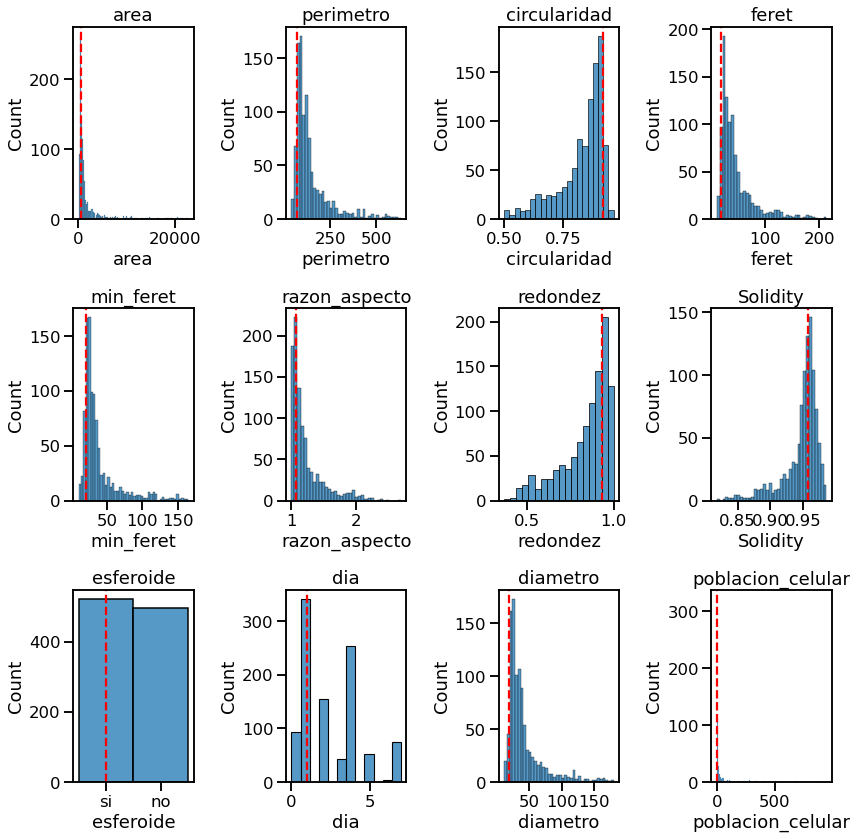

In [16]:
num_variables = len(fiji_datos_clean_names.columns)

# Calcular el numero de filas y columnas para el arreglo del subplot
num_rows = (num_variables - 3) // 4 + 1  # Restamos 2 para excluir la primera columna
num_cols = min(num_variables - 1, 4)  # Restamos 1 para excluir la primera columna

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

# Aplanar la matriz de ejes para que sea iterable
axes = axes.flatten()

# Iterar sobre las columnas numéricas (excluyendo la primera columna) y trazar distribuciones
for i, column in enumerate(fiji_datos_clean_names.columns[1:]):  # Iniciamos desde la segunda columna
    sns.histplot(fiji_datos_clean_names[column], ax=axes[i])
    axes[i].set_title(column)

    # Agregar una línea vertical que represente el modo de la variable
    mode = fiji_datos_clean_names[column].mode().values[0]
    axes[i].axvline(x=mode, color='r', linestyle='--')

        # Establecer los límites del eje y para cada subplot
    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(0, ymax)  # Ajusta la altura en y según tus necesidades

# Eliminar los subplots no utilizados
for j in range(num_variables - 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()

Del gráfico anterior se puede observar que:

- `area` y `poblacion_celular` tienen valores muy dispersos y ambas variables tienen valores cercanos a cero como lo indica la línea roja que corresponde a la **moda** (dato que más se repite), por lo tanto, en este primer "barrido" no se puede determinar si presentan distribución normal.


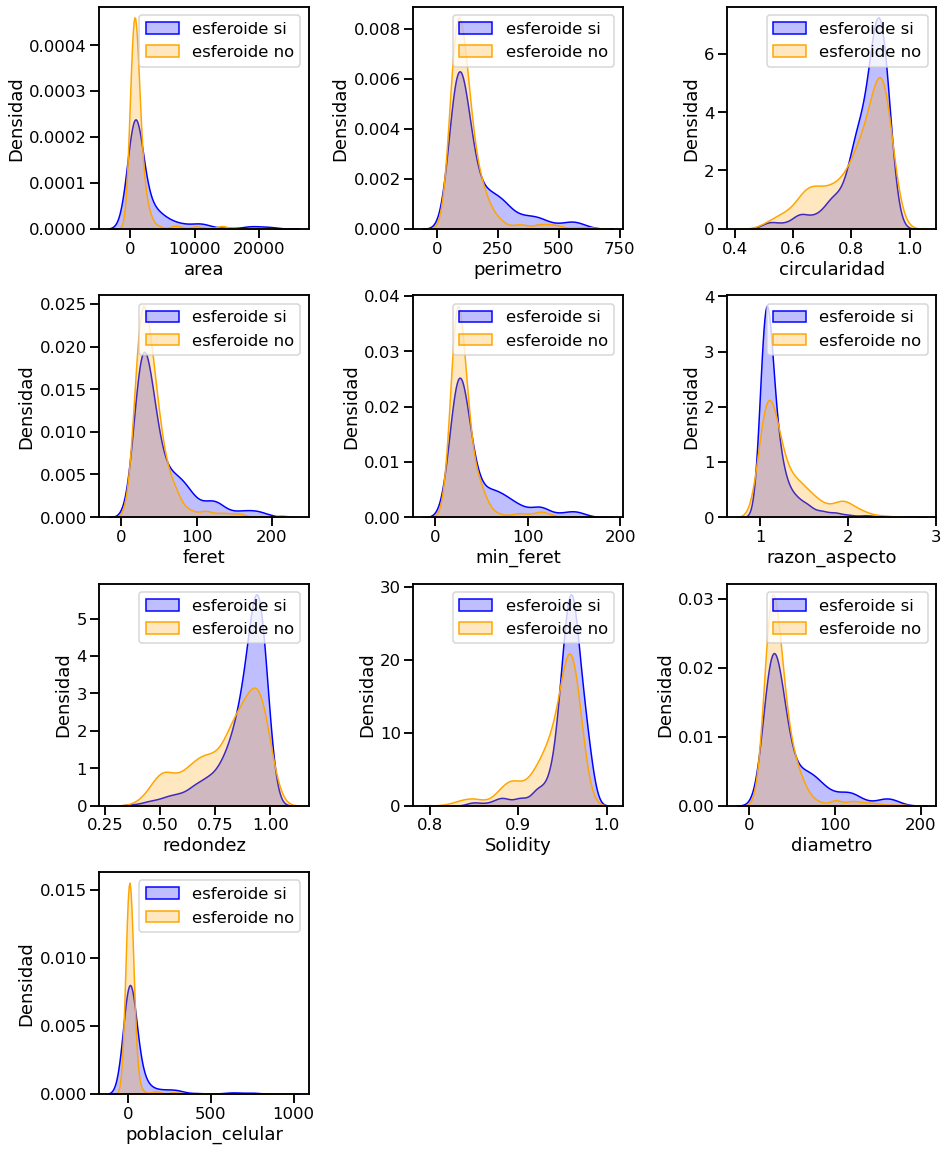

In [17]:
#otra dorma de observar la distribucion de cada variable respecto a la frecuencia 

# Obtener la lista de nombres de columnas numéricas
num_cols = [col for col in num_cols_df.columns]

# Calcular el numero de filas y columnas para el arreglo del subplot
num_rows = (len(num_cols) - 1) // 3 + 1
num_cols_subplot = min(len(num_cols), 3)

# Configurar el arreglo del subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_subplot, figsize=(15, 5*num_rows),
                         gridspec_kw={'hspace': 0.3, 'wspace': 0.5})

# Aplanar la matriz de ejes
axes = axes.flatten()

# Crear subplots para cada variable numérica contra la variable categórica
for i, column in enumerate(num_cols):
    # Graficar la curva de densidad para esferoides "si"
    sns.kdeplot(data=fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'si'][column],
                label='esferoide si', ax=axes[i], color='blue', shade=True)

    # Graficar la curva de densidad para esferoides "no"
    sns.kdeplot(data=fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'no'][column],
                label='esferoide no', ax=axes[i], color='orange', shade=True)

    axes[i].set_ylabel('Densidad')
    axes[i].set_xlabel(column)
    axes[i].legend()

# Eliminar subplots vacíos si es necesario
if len(num_cols) < len(axes):
    for j in range(len(num_cols), len(axes)):
        fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()

In [18]:
fiji_datos_clean_names.columns

Index(['nombre_id', 'area', 'perimetro', 'circularidad', 'feret', 'min_feret',
       'razon_aspecto', 'redondez', 'Solidity', 'esferoide', 'dia', 'diametro',
       'poblacion_celular'],
      dtype='object')

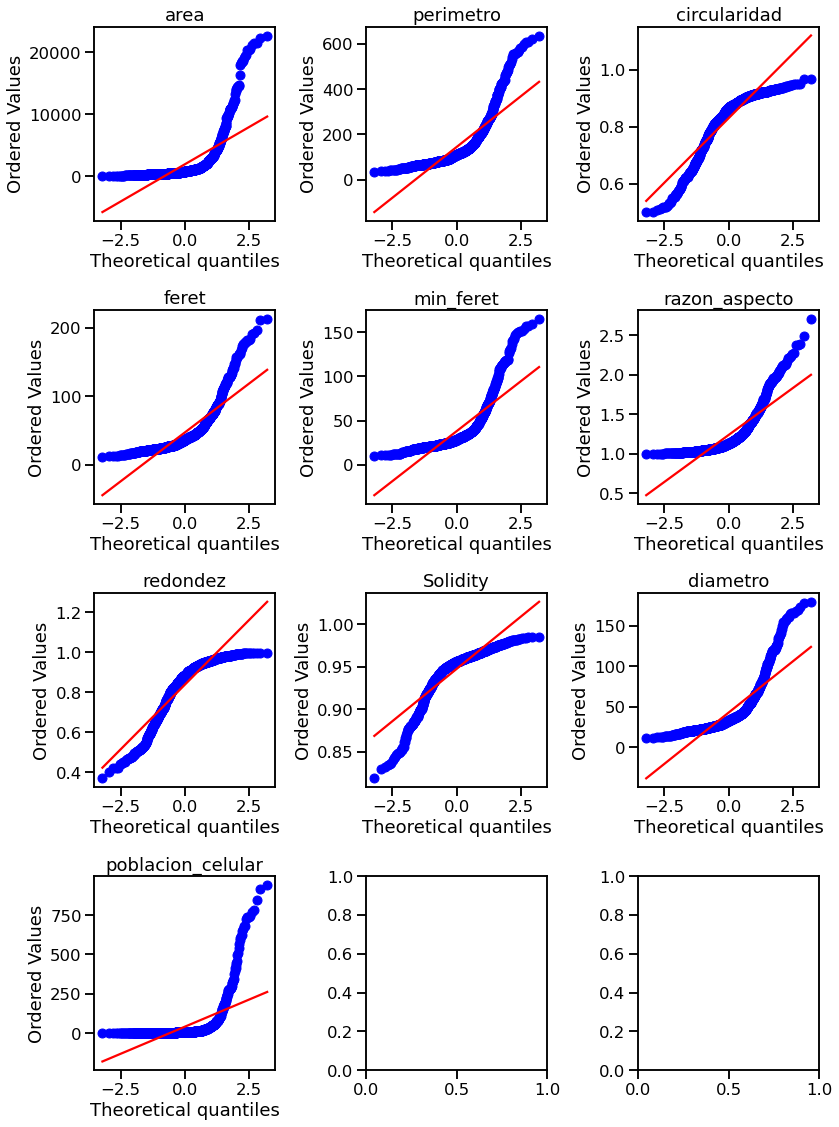

In [19]:
###-------------------------------------------------------------------------------
## Aplicando el test método Quantile-Quantile Normal
###------------------------------------------------------------------------------

import scipy.stats as stats


# Especificar las columnas para plotear
columns = ['area', 'perimetro', 'circularidad', 'feret', 'min_feret',
           'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']

# Calcular el numero de filas y columnas para el arreglo del subplot
num_rows = (len(columns) - 1) // 3 + 1
num_cols = min(len(columns), 3)

# Crear el subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))

# Iterar sobre las columnas y plotear los gráficos de probabilidad
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    stats.probplot(fiji_datos_clean_names[column], dist="norm", plot=ax)
    ax.set_title(column)

# ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()


Los datos presentan discrepacias estadísticas entre las observaciones y la distribución normal. Por ello vamos a realizar un segundo test aplicando contraste de normalidad aplicando la prueba de **Shapiro-Wilks**.

In [20]:
###-------------------------------------------------------------------------------
## Aplicando el test Shapiro-Wilks
###-------------------------------------------------------------------------------

from scipy.stats import shapiro

for col in columns:
    estadistico, p_value = shapiro(fiji_datos_clean_names[columns])
    print(f"Columna: {columns}")
    print(f"Estadístico = {estadistico:.3f}, p-value = {p_value:.3f}")
    print()

Columna: ['area', 'perimetro', 'circularidad', 'feret', 'min_feret', 'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']
Estadístico = 0.164, p-value = 0.000

Columna: ['area', 'perimetro', 'circularidad', 'feret', 'min_feret', 'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']
Estadístico = 0.164, p-value = 0.000

Columna: ['area', 'perimetro', 'circularidad', 'feret', 'min_feret', 'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']
Estadístico = 0.164, p-value = 0.000

Columna: ['area', 'perimetro', 'circularidad', 'feret', 'min_feret', 'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']
Estadístico = 0.164, p-value = 0.000

Columna: ['area', 'perimetro', 'circularidad', 'feret', 'min_feret', 'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']
Estadístico = 0.164, p-value = 0.000

Columna: ['area', 'perimetro', 'circularidad', 'feret', 'min_feret', 'razon_aspecto', 'redondez

Por el perfil de la distribución en el histogramas *pareciera* que la mayoría de la variables presentan una distribución tipo **exponencial** a excepción de la variable `dia`.

Del test de Shapiro-Wilk concluímos que:

- Ho (hipótesis nula): La muestra presenta distribución normal (Po>0.05)
- Ha (hipótesis alternativa): La muestra NO presenta distribución normal


Se observa que el p_value es <<< 0.05 lo cual NO se acepta la hipotesis nula




**[Lu]**

En un test de hipótesis, no se "acepta" la hipótesis nula, sino que se "falla en rechazar" o "no se rechaza" la hipótesis nula.

En este caso, si el valor de p es mucho menor a 0.05, se tiene evidencia estadística suficiente para rechazar la hipótesis nula y se concluye que la muestra no sigue una distribución normal.

**[Lu]**

*corregido por lau*

### 3.d) ¿Tales variables son independientes entre sí?

Lo que queremos analizar es si hay una CORRELACION entre las variables.

*Corregido por lau: no era necesario lo de las muestras independeintes sino la CORRELACION entre las variables!*


In [21]:
# ==============================================================================
# matrix de correlaciones entre variables
# ==============================================================================
"""
Se usa el método de spearman porque como se observó en la base de datos
tenemos variables que parecen tener una distribución normal y otra que no la
tienen.
"""

import scipy.stats as stats
import pandas as pd

mat_corr = fiji_datos_clean_names.corr(method="spearman")
p_values = pd.DataFrame(index=mat_corr.columns, columns=mat_corr.columns)

for col1 in mat_corr.columns:
    for col2 in mat_corr.columns:
        if col1 != col2:
            corr, p_value = stats.spearmanr(fiji_datos_clean_names[col1], fiji_datos_clean_names[col2])
            p_values.loc[col1, col2] = p_value

# Convert p-values to numeric type
p_values = p_values.astype(float)

# Convert p-values matrix to DataFrame
p_values_df = pd.DataFrame(p_values, columns=mat_corr.columns, index=mat_corr.columns)

# Print the p-value matrix
print('\nMatriz de p-valores:\n', p_values_df, '\n')


Matriz de p-valores:
                            area      perimetro   circularidad          feret  \
area                        NaN   0.000000e+00   1.817807e-98   0.000000e+00   
perimetro          0.000000e+00            NaN  8.281185e-134   0.000000e+00   
circularidad       1.817807e-98  8.281185e-134            NaN  2.175717e-144   
feret              0.000000e+00   0.000000e+00  2.175717e-144            NaN   
min_feret          0.000000e+00   0.000000e+00   5.679769e-66   0.000000e+00   
razon_aspecto      1.202419e-28   1.108898e-38  1.052841e-137   3.472903e-51   
redondez           1.232847e-28   1.143704e-38  1.132422e-137   3.600981e-51   
Solidity           2.944873e-10   3.905077e-04   1.967012e-87   2.642643e-03   
dia                7.595638e-18   5.993993e-17   5.699864e-05   7.467138e-17   
diametro           0.000000e+00   0.000000e+00  2.854899e-113   0.000000e+00   
poblacion_celular  0.000000e+00   0.000000e+00  2.854899e-113   0.000000e+00   

                

In [22]:
##Resaltar aquellos p_values >0.8 donde se acepta la Ho
def highlighter(cell_value):
  if cell_value > 0.8:
        return "background-color: green"
mat_corr.style.applymap(highlighter)

,area,perimetro,circularidad,feret,min_feret,razon_aspecto,redondez,Solidity,dia,diametro,poblacion_celular
area,1.000000,0.992744,-0.594885,0.986017,0.979408,0.338128,-0.338064,0.195831,0.265197,0.998029,0.998029
perimetro,0.992744,1.000000,-0.670370,0.995606,0.959434,0.391755,-0.391689,0.110945,0.258050,0.996918,0.996918
circularidad,-0.594885,-0.670370,1.000000,-0.689311,-0.501606,-0.677511,0.677454,0.566407,-0.125801,-0.629090,-0.629090
feret,0.986017,0.995606,-0.689311,1.000000,0.939709,0.447113,-0.447050,0.094136,0.257277,0.991866,0.991866
min_feret,0.979408,0.959434,-0.501606,0.939709,1.000000,0.195302,-0.195235,0.260980,0.282690,0.974324,0.974324
razon_aspecto,0.338128,0.391755,-0.677511,0.447113,0.195302,1.000000,-1.000000,-0.374658,-0.000941,0.360153,0.360153
redondez,-0.338064,-0.391689,0.677454,-0.447050,-0.195235,-1.000000,1.000000,0.374658,0.001009,-0.360088,-0.360088
Solidity,0.195831,0.110945,0.566407,0.094136,0.260980,-0.374658,0.374658,1.000000,0.113608,0.156398,0.156398
dia,0.265197,0.258050,-0.125801,0.257277,0.282690,-0.000941,0.001009,0.113608,1.000000,0.266364,0.266364
diametro,0.998029,0.996918,-0.629090,0.991866,0.974324,0.360153,-0.360088,0.156398,0.266364,1.000000,1.000000


In [23]:
##Resaltar aquellos p_values >0.05 donde se acepta la Ho
def highlighter(cell_value):
    if cell_value > 0.05:
        return "background-color: red"
p_values_df.style.applymap(highlighter)

,area,perimetro,circularidad,feret,min_feret,razon_aspecto,redondez,Solidity,dia,diametro,poblacion_celular
area,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
perimetro,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000391,0.000000,0.000000,0.000000
circularidad,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000057,0.000000,0.000000
feret,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.002643,0.000000,0.000000,0.000000
min_feret,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
razon_aspecto,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.976078,0.000000,0.000000
redondez,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.974344,0.000000,0.000000
Solidity,0.000000,0.000391,0.000000,0.002643,0.000000,0.000000,0.000000,nan,0.000281,0.000001,0.000001
dia,0.000000,0.000000,0.000057,0.000000,0.000000,0.976078,0.974344,0.000281,nan,0.000000,0.000000
diametro,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,nan,0.000000


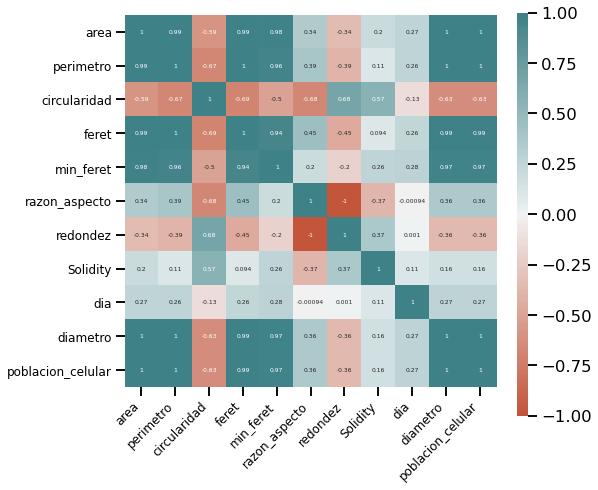

In [24]:
# Mapa de calor de matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Crear un eje de color separado
cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])

sns.heatmap(
    mat_corr,
    annot=True,
    cbar=True,
    annot_kws={"size": 6},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,
    ax=ax,
    cbar_ax=cax  # Asignar el eje de color separado
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=12)

# Ajustar el espaciado entre el heatmap y la barra de color
fig.tight_layout(rect=[0, 0, 0.99, 0.88])

# Mostrar el plot
plt.show()

**[Lu]**

Entonces, de este análisis de correlaciones, que pueden decir de la independencia de las variables? Porqué hacen el análisis por Person luego? O sea, si es para reforzar lo que observaron con el análisis presentado, desarrollen un poco mas lo que implica.

**[Lu]**

*Lau: se borra analisis de pearson*

### 3.e) ¿La probabilidad de que la redondez ('Round') sea mayor a 0.9 en los clasificados como Esferoides = si es mayor que los clasificados como Esferoides = no?.

Si es mayor en un 20%

In [25]:
# Supongamos que tienes los datos en un DataFrame llamado 'datos'
# con las columnas 'Redondez', 'Esferoides', y otras columnas si es necesario

# Filtrar los datos para los casos donde Esferoides = 'si'
esferoides_si = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'si']

# Filtrar los datos para los casos donde Esferoides = 'no'
esferoides_no = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'no']

# Calcular la probabilidad de redondez > 0.9 en los Esferoides = 'si'
probabilidad_si = len(esferoides_si[esferoides_si['redondez'] > 0.9]) / len(esferoides_si)

# Calcular la probabilidad de redondez > 0.9 en los Esferoides = 'no'
probabilidad_no = len(esferoides_no[esferoides_no['redondez'] > 0.9]) / len(esferoides_no)

print("Probabilidad de redondez > 0.9 en los Esferoides = 'si':", probabilidad_si)
print("Probabilidad de redondez > 0.9 en los Esferoides = 'no':", probabilidad_no)

Probabilidad de redondez > 0.9 en los Esferoides = 'si': 0.5593869731800766
Probabilidad de redondez > 0.9 en los Esferoides = 'no': 0.3528225806451613


# 4) Exploración muestras por día

### 4.a) ¿Cuántos datos hay por día? Hacer gráfico de frecuencias.

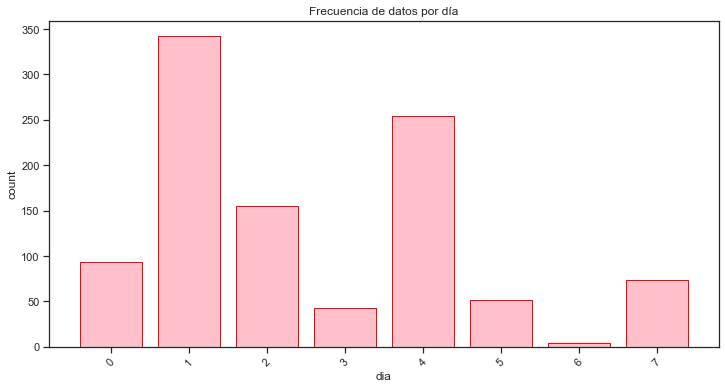

In [33]:
#  número de datos por día
datos_por_dia = fiji_datos_clean_names['dia'].value_counts().sort_index()
columns = ['area', 'perimetro', 'circularidad', 'feret', 'min_feret',
           'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']

#gráfico de frecuencias
plt.figure(figsize=(12, 6))
plt.bar(datos_por_dia.index, datos_por_dia.values, edgecolor = 'red', color = 'pink')
plt.title('Frecuencia de datos por día')
plt.xlabel('dia')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Se observa que al día 6 hay MUY pocos datos y en otros días más, esto da el índice de un dataset muy desbalancedo en sus etiquetas. Esto es un inconveniente para la interpretación de los modelos, lo que se podría hacer es elimar ese index de esa variable.

In [27]:
datos_por_dia

0     94
1    342
2    155
3     43
4    254
5     52
6      4
7     74
Name: dia, dtype: int64

### 4.b) Explorar con diagramas de cajas al menos una columna (ej. Diameter, n_diam, pero pueden animarse a más).

### 4.c) Discriminar la(s) columna(s) elegida(s) en Esferoide si y no y ver sus distribuciones. ¿Son distintas?. Describirlas (asimetría, kurtosis, etc..)

**[Lu]**

Perdón, pensé que como estaba en el inciso de "*explorar la muestra por día*" se iba a entender que la idea era explorar alguna variable **por día**, no graficar el diagrama de cajas de todas las variables en total.

**[Lu]**

*Lau:corregido abajo*

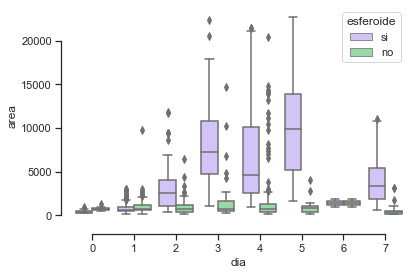

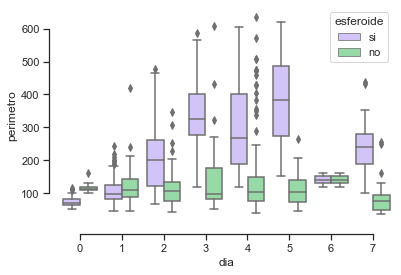

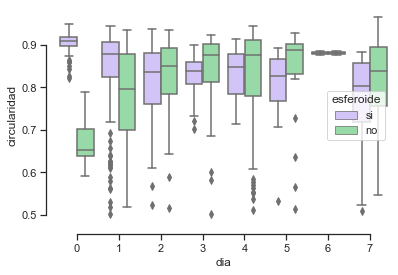

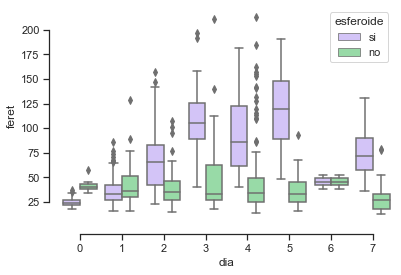

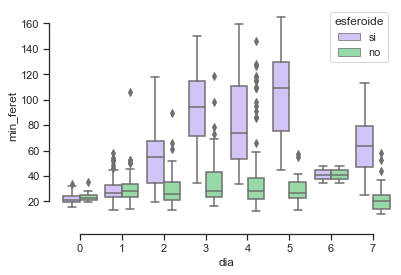

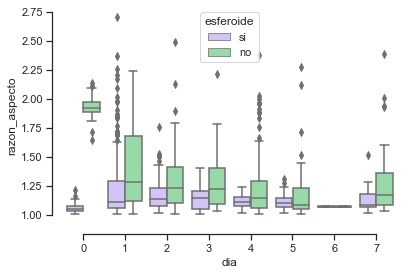

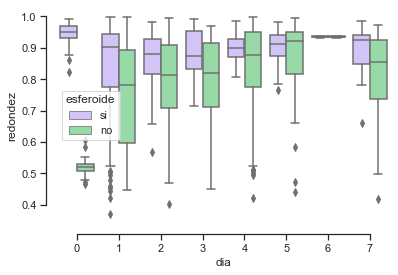

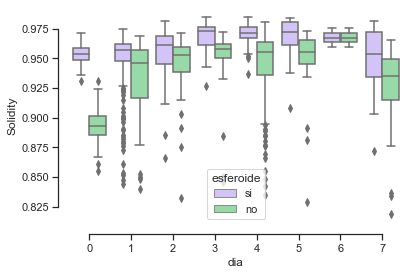

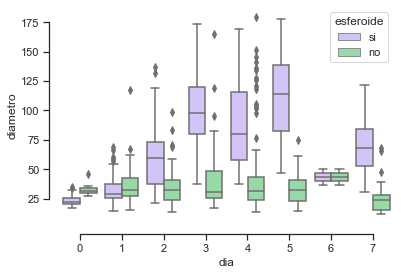

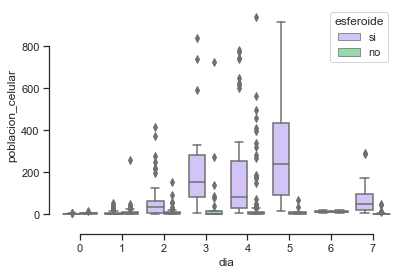

In [36]:
sns.set_theme(style="ticks", palette="pastel")

for i, col in enumerate(columns):
    sns.boxplot(y=col, x=fiji_datos_clean_names['dia'], hue='esferoide', data=fiji_datos_clean_names, palette=["m", "g"])
    sns.despine(offset=10, trim=True)
    plt.show()

Qué pueden decir de lo que observan? Algo que les haya llamado la atención? Por ej, les parece que se es notable el crecimiento en alguna variable? Pueden decir algo de la distribución de esferoides si o no?

En todos los casos se observa el desbalance de los datos en el dia 6

**Area vs Dia:** se observa una gran variabilidad del area de esferoides si entre el dia 3 y 5. El area de esferoides no se mantiene concentrada y baja a lo largo de todos los dias.

**Perimetro vs Dia:** se observa que el perimetro de esferoides si es mayor a esferoides no, ademas tambien como en caso anterior hay una mayor variabilidad entre los dias 3 y 5. 

**circularidad vs dia**: se ve que en el dia 0 esferoides si tiene una circularidad de 1 (mayor) a esferoides no, a sido un criterio significativo para el ojo experto. A lo largo de los dias la variabilidad de esferoides no aumenta, en cambio en esferoides si se mantiene dentro de los mismos rangos

**Feret y min_feret vs dia**: como en los otros casos tenemos una varianza mayor entre los dias 3 y 5 para esferoides si, en cambio para esferoides no encontramos los datos concentrados

**poblacion celular vs dia** :  En este grafico se observa como la poblacion celular de esferoides no se ve concentrada en 0 , a diferencia de esferoides si , que hay una varianza mayor predominando entre 3 y 5 como los demas graficos de cajas . 

Viendo el grafico de frecuencias vemos :

3     43
4    254
5     52

lo cual me parecio interesante analizar que la varianza entre estos dias entre sus variables es similar, aunque en el dia 4 se cuadripliquen los datos respecto al dia 3 y 5 . 


Como se observó anteriormente en el histograma y acá en el boxplot, las varaibles `poblacion_celular`' y `area` son quienes presentan mayor cantidad de outliers.

### 4.d) ¿Hay outliers? Hacer con el total y luego discriminando por Esferoide' si y no. ¿Qué pueden implicar biológicamente? Si los eliminan, ¿cuál sería la justificación?

Hay muchas formas de analizar los outliers, una de ellas se puede observar en los graficos de variables vs. dias, y decicimos anexar un analisis de estadistica descriptiva que nos permite visualizar los cuartiles y los maximos para completar el análisis

In [70]:
from scipy import stats

# Filtrar los datos para separar los "Esferoides" y los "No Esferoides"
esferoides = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'si']
no_esferoides = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'no']

# Obtener las características de forma para cada grupo
caracteristicas_esferoides = esferoides[['area', 'perimetro', 'circularidad', 'feret', 'min_feret',
           'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']]
caracteristicas_no_esferoides = no_esferoides[['area', 'perimetro', 'circularidad', 'feret', 'min_feret',
           'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']]


# Calcular las estadísticas descriptivas para cada grupo
estadisticas_esferoides = esferoides.describe()
estadisticas_no_esferoides = no_esferoides.describe()

df_estadisticas_esferoides = pd.DataFrame(estadisticas_esferoides)

df_estadisticas_no_esferoides = pd.DataFrame(estadisticas_no_esferoides)

In [71]:
df_estadisticas_esferoides

,area,perimetro,circularidad,feret,min_feret,razon_aspecto,redondez,Solidity,dia,diametro,poblacion_celular
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,2572.568024,163.332271,0.844440,52.721244,44.304683,1.173235,0.872393,0.954290,1.904215,48.512964,57.063768
std,4080.043981,119.203532,0.085080,36.978447,31.433754,0.214188,0.113603,0.021686,1.839642,34.071584,137.208958
min,155.530000,45.524600,0.500600,15.326800,13.587000,1.000800,0.369200,0.844000,0.000000,14.456900,0.489618
25%,484.704500,82.402500,0.815425,26.988525,23.777200,1.053825,0.829475,0.949350,1.000000,25.534250,2.697745
50%,913.104400,116.398150,0.872850,38.663050,31.237050,1.096900,0.911650,0.958550,1.000000,35.153300,7.039540
75%,2639.972400,203.985250,0.903000,66.482400,54.873925,1.205575,0.948900,0.965975,2.000000,60.115713,35.204457
max,22735.999500,620.239100,0.949800,196.839800,165.233000,2.708700,0.999200,0.985100,7.000000,178.159100,916.337691


In [72]:
df_estadisticas_no_esferoides

,area,perimetro,circularidad,feret,min_feret,razon_aspecto,redondez,Solidity,dia,diametro,poblacion_celular
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,1292.487079,124.666555,0.815138,41.653276,31.765076,1.305375,0.801681,0.939857,3.235887,36.709176,22.457299
std,2219.104897,82.219592,0.107214,26.581170,18.827815,0.311039,0.153307,0.030360,1.816535,22.473669,78.969919
min,100.148400,36.082000,0.500300,12.247100,9.722300,1.001200,0.400900,0.818500,0.000000,11.558350,0.250218
25%,422.977125,78.518300,0.750075,25.727725,21.649725,1.073675,0.695200,0.929025,2.000000,24.115037,2.272512
50%,695.039300,104.883400,0.849350,34.955100,26.674450,1.187100,0.842400,0.950750,4.000000,30.978500,4.817411
75%,1187.704925,139.815675,0.901925,47.602825,34.739300,1.438350,0.931400,0.960950,4.000000,40.941113,11.120162
max,20410.433200,635.872400,0.966700,213.226500,146.312100,2.494300,0.998800,0.980700,7.000000,179.769300,941.408471


Si hacemos un analisis conjunto de los estadisticos y los graficos de barra , mas particularmente viendo los minimos y maximos respecto a los cuartiles. Vemos que debemos remover outliers en `poblacion_celular`' y `area` que nos quienes tienen outliers bastante alejados del cuarto cuartil. No sacamos de otras variables porque la cantidad de datos totales no es muy grande y remover outliers en todas aquellas que presenten, podemos perder información.

In [73]:
#import pandas as pd
#import numpy as np
# ==============================================================================
# Función para obtener remover valores atípicos usando el método de rango intercuartílico (IQR)
# ==============================================================================
def remove_outliers_iqr(dataframe, column_name, lower_bound=0.25, upper_bound=0.75):
   # Calcular el rango IQR
    q1 = dataframe[column_name].quantile(lower_bound)
    q3 = dataframe[column_name].quantile(upper_bound)
    iqr = q3 - q1

    # Definir los límites inferior y superior para los valores atípicos
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filtrar los valores atípicos
    filtered_data = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]

    return filtered_data

In [74]:
# num_cols_df = num_cols_df.astype(float)
# num_cols_df.info()

In [76]:
###Remover outliers
df_outlier_removed = remove_outliers_iqr(fiji_datos_clean_names, 'poblacion_celular')
df_outlier_removed = remove_outliers_iqr(df_outlier_removed, 'area')

print(fiji_datos_clean_names.shape)
print(df_outlier_removed.shape)


(1018, 13)
(813, 13)


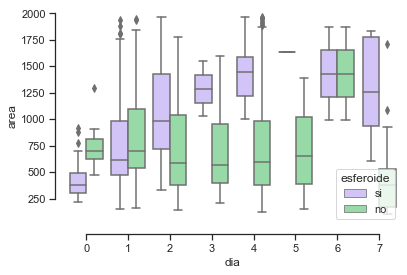

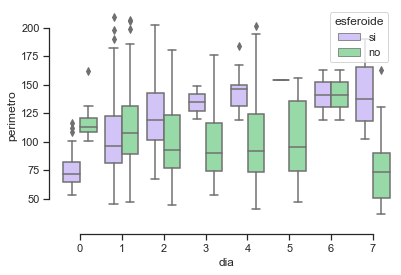

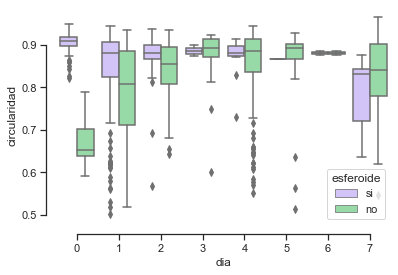

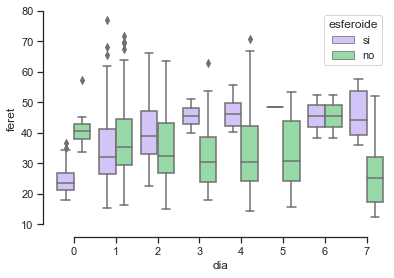

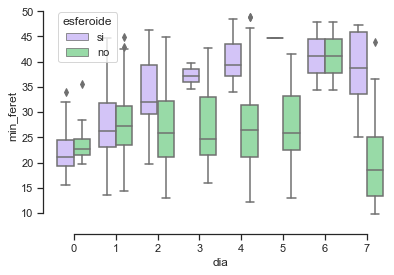

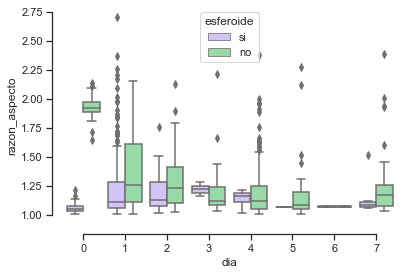

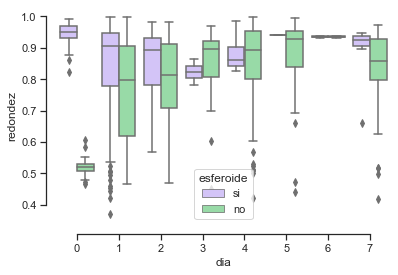

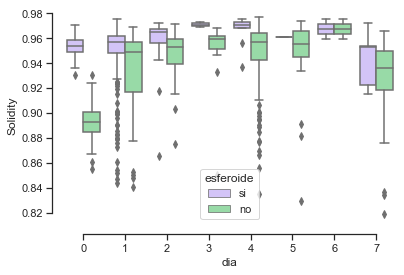

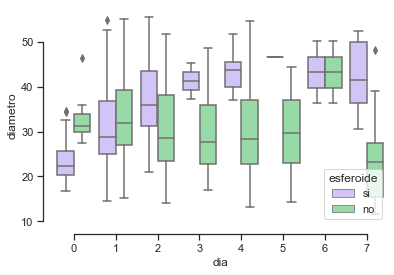

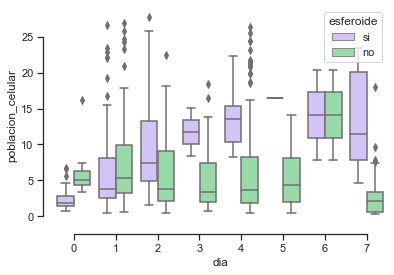

In [77]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt


# Crear subplots para cada variable numérica contra la variable categórica
for i, col in enumerate(columns):
    sns.boxplot(y=col, x=df_outlier_removed['dia'], hue='esferoide', data=df_outlier_removed, palette=["m", "g"])
    sns.despine(offset=10, trim=True)
    plt.show()
    
    sns.set_theme(style="ticks", palette="pastel")




plt.show()


sns.set_theme(style="ticks", palette="pastel")



**[Lu]**

Acá también, la idea era elegir una variable y discriminarla *por día* y por esferoide *si* y *no*. Distinguir outliers y plantear posibles razones de por cual hay mas outliers en algún día por ej.

**[Lu]**

### 4.e) La media de los esferoides=no al día 3 es igual que al día 5? Realizar Test de Hipótesis.

In [80]:
import numpy as np
from scipy.stats import t


# Filtrar los datos para los casos donde Esferoides = 'no' y los respectivos dias
esferoides_no_3 = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'no'][fiji_datos_clean_names['dia'] == 3]
esferoides_no_5 = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'no'][fiji_datos_clean_names['dia'] == 5]

# Calcular la media y desviación estándar de cada conjunto de datos
mean1 = np.mean(esferoides_no_3)
mean2 = np.mean(esferoides_no_5)
std1 = np.std(esferoides_no_3, ddof=1)
std2 = np.std(esferoides_no_5, ddof=1)

# Calcular el tamaño de muestra y los grados de libertad
n1 = len(esferoides_no_3)
n2 = len(esferoides_no_5)
df = n1 + n2 - 2

# Calcular estadistico T
t_statistic = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Bilateral
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))

print("diferencia de Media: ","\n", (mean1 - mean2),"\n\n")
print("Estadístico T:","\n",round(t_statistic,5),"\n\n")
print("Valor p:","\n", p_value)

diferencia de Media:  
 area                 1334.443897
perimetro              48.138326
circularidad           -0.012982
feret                  16.910783
min_feret              10.145021
razon_aspecto           0.047614
redondez               -0.043299
Solidity                0.001360
dia                    -2.000000
diametro               13.527902
poblacion_celular      48.963056
dtype: float64 


Estadístico T: 
 area                 1.84338
perimetro            1.69962
circularidad        -0.39249
feret                1.73535
min_feret            1.74672
razon_aspecto        0.52632
redondez            -0.99764
Solidity             0.14150
dia                     -inf
diametro             1.75355
poblacion_celular    1.60259
dtype: float64 


Valor p: 
 [0.07158386 0.09581167 0.69646897 0.08923295 0.08721815 0.60114035
 0.32356443 0.88807909 0.         0.08602763 0.1157259 ]


**[Lu]**

Genial que calcularon para todas las variables pero, que concluyen a partir de los resultados obtenidos?

Además, les pedía comparar las "medias", cuál test podrían haber ocupado? que ya está implementado y que ya lo usaron. Probar con una variable, ej: 'poblacion_celular' u 'area' como para ver si les está dando lo mismo y pueden llegar a la misma conclusión.

**[Lu]**

*Lau: 

Supongamos que usamos un nivel de significancia alfa de 0.05 (5%).
Comparando los valores p obtenidos para la variable **'poblacion_celular':Como el valor p (0.1157259)** >> (0.05), no podemos rechazar la hipótesis nula. Esto significa que no hay suficiente evidencia para afirmar que la media de los esferoides=no al día 3 es diferente de la media al día 5 para la variable 'poblacion_celular'

Para la mayoría de las variables, el valor p >alfa . Esto significa que no podemos rechazar la hipótesis nula para estas variables. En otras palabras, no hay suficiente evidencia para afirmar que las medias de los esferoides=no al día 3 y al día 5 sean diferentes para la mayoría de las variables.*


### 4.f) Determinen el intervalo de confianza diario de tal(es) columna(s) para las clasificadas como 'Esferoide'='si'. Y exploren como utilizarlos como barras de error en el gráfico.

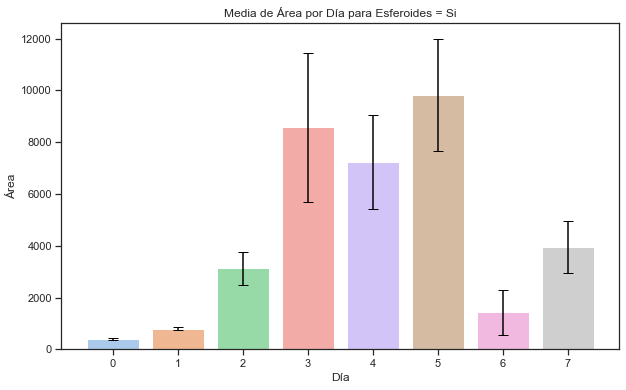

In [85]:
# Crear el DataFrame con los datos y las columnas adecuadas
fiji_datos_clean_names = pd.DataFrame(fiji_datos_clean_names, columns=['area', 'perimetro', 'circularidad', 'feret', 'min_feret',
                                                     'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular',
                                                     'esferoide', 'dia'])

# Filtrar los datos para el tipo de esferoide 'si'
esferoides_si = fiji_datos_clean_names[fiji_datos_clean_names['esferoide'] == 'si']

# Calcular la media de 'area' por día y tipo de esferoide 'si'
media_area_por_dia_esferoide_si = esferoides_si.groupby(['dia'])['area'].mean().reset_index()

# Calcular el tamaño de muestra para cada combinación día-esferoide 'si'
tamano_muestra_por_dia_esferoide_si = esferoides_si.groupby(['dia'])['area'].size().reset_index()

# Calcular el error estándar para cada combinación día-esferoide 'si'
error_estandar_por_dia_esferoide_si = esferoides_si.groupby(['dia'])['area'].sem().reset_index()

# Calcular el intervalo de confianza para cada combinación día-esferoide 'si'
nivel_confianza = 0.95
z_value = 1.96  # Para un nivel de confianza del 95%
intervalo_confianza_por_dia_esferoide_si = z_value * error_estandar_por_dia_esferoide_si['area']

# Graficar las medias con intervalos de confianza
plt.figure(figsize=(10, 6))
sns.barplot(data=media_area_por_dia_esferoide_si, x='dia', y='area', ci='sd')
plt.errorbar(x=media_area_por_dia_esferoide_si['dia'], y=media_area_por_dia_esferoide_si['area'],
             yerr=intervalo_confianza_por_dia_esferoide_si, fmt='none', capsize=5, color='black')
plt.xlabel('Día')
plt.ylabel('Área')
plt.title('Media de Área por Día para Esferoides = Si')
plt.show()

El gráfico resultante se muestran las medias de 'area' para cada día con barras verticales que representan el intervalo de confianza para cada media. De esta manera, podrás visualizar cómo varía la media de 'area' para el tipo de esferoide 'si' en cada día y tener una idea de la precisión de cada estimación de media.

# 5) ¿Qué otras preguntas se pueden o quisieran plantear?

Consideramos que es importante realizar un análsis univariado más en detalle para cada variable con el objetivo de saber cuál son esas variables capaces de generar "buenas" predicciones respecto a la variable a predecir.

Esto se conoce como análisis univariado.

⚠️⚠️⚠️ ADVERTENCIA ⚠️⚠️⚠️

Este análisis nos mostrará sólo una faceta de las posibles relaciones entre una cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.

**[Lu]**

Genial que lo desarrollaron la idea de ánálisis univariado, también la idea era plantear preguntas e hipótesis que se les ocurrieran, sean realistas o no.

Creo que un análisis como el que realizaron acá podría servir mucho para el 3er práctico, para cuando ya identificaron (que ya se los spolié) que para determinar si es o no esferoide conviene tomar sólo los días 3,4 y 5. Ya que los datos de las etiquetas de los otros días no son tan confiables, pero de todas formas, el análisis temporal de crecimiento de algunas variables, es lindo observarlo, como lo notan un poco al final de este punto.


**[Lu]**

In [ ]:
##Para esta parte trabajamos con los datos sin remover outliers
data = fiji_datos_clean_names.copy(deep=True)
data

# Análisis univariado

In [ ]:
# Comencemos representando la variable a predecir de forma binaria:
# 'si' = 1, 'no' = 0
diccionario = {'si':1, 'no':0}
binario = data['esferoide'].map(diccionario)
data['y_bin'] = binario
# De esta forma resulta fácil calcular la tasa de conversión: el promedio
# de la columna 'y_bin'

In [ ]:
# Función para graficar tasas de conversión

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order).grid(axis='y', color='black', alpha=0.3)
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)

In [ ]:
data.columns

## dia

In [ ]:
# Y graficar las tasas de conversión para la variable día
## solo de esta realizar un barplor porque tiene pocos valores únicos
graficar_tasas_conversion('dia','y_bin', type='bar')

In [ ]:
print('Cardinalidad:', data['dia'].nunique())
print()
print('Cuentas para cada día:')
print(data['dia'].value_counts())
print()
print('Cuentas en porcentaje para cada día:')
print(100*data['dia'].value_counts(normalize=True).iloc[:10])

Antes de analizar el gráfico rescatanos los datos que de cardinalidad donde se observa que 1-2-4 son los que representan cerca del ~74% de los datos y el dia = 6 cuenta con tan solo 4 datos.

Del gráfico vemos que al **día 0 y 1** son los que presentan mayor  tasa de conversión, es decir, del total de los datos los colectados en esos días más 70% influyen en la variable respuesta "esferoide". De forma general se observa que entre los diferentes días hay diferencias entre las tasas, por lo tanto, podemos concluir asi a primera vista que la variable `dia` podría ser una variable predictora para nuestra variable respuesta, `esferoide`.

Para el resto de las variables como cada una tiene muchos valores únicos, conviene realizar un scatterplot.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type == 'line': # Útil para rangos continuos
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type == 'bar': # Útil si los datos están divididos en rangos o son categóricos
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid(axis='y', color='black', alpha=0.2)
    elif type == 'scatter': # Útil si los datos están divididos en rangos o son categóricos
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

var_predictora = ['area', 'perimetro', 'ancho', 'altura', 'circularidad', 'feret', 'FeretAngle', 'min_feret',
                  'razon_aspecto', 'redondez', 'Solidity', 'diametro', 'poblacion_celular']
var_predecir = 'y_bin'

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(var_predictora):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    plt.sca(ax)  # Establecer el subplot actual como el "current axes"
    graficar_tasas_conversion(var, var_predecir, type='scatter')
    plt.title(var)

plt.tight_layout()
plt.show()


Con el gráfco anterior no podemos ver alguna tendencia o grupos que nos permita realizar algunas deducciones del dataset ya que en el scatter estan muy dispersos, pero podemos recurrir a realizar algunos rangos de datos por columna que nos permita extraer información.

In [ ]:
data.describe()

## area

In [ ]:
# Nueva columna en el dataset: "grupos_area"

data.loc[(data['area']>=0) & (data['area']<2500),'grupos_area'] = "0K-2.5K"
data.loc[(data['area']>=2500) & (data['area']<5000),'grupos_area'] = "2.5K-5K"
data.loc[(data['area']>=5000) & (data['area']<7500),'grupos_area'] = "5K-7.5K"
data.loc[(data['area']>=7500) & (data['area']<10000),'grupos_area'] = "7.5K-10K"
data.loc[(data['area']>=10000) & (data['area']<12500),'grupos_area'] = "10K-12.5K"
data.loc[(data['area']>=12500) & (data['area']<15000),'grupos_area'] = "12.5K-15K"
data.loc[(data['area']>=15000) & (data['area']<17500),'grupos_area'] = "15K-17.5K"
data.loc[(data['area']>=17500) & (data['area']<2000),'grupos_area'] = "17.5K-20K"
data.loc[data['area']>=20000,'grupos_area'] = ">20K"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_area','y_bin',type='bar')
orden = ["0K-2.5K", "2.5K-5K", "5K-7.5K", "7.5K-10K", "10K-12.5K", "12.5K-15K", "15K-17.5K", '17.5K-20K', '>20K']
graficar_tasas_conversion('grupos_area','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['area'])
plt.xlabel('area')
plt.tight_layout()
# plt.xlim(0,5000)
plt.show()

In [ ]:
# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_area'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)


De la variable `area` se observa que en el primer grupo 0K-2.5K esta el 82% de los datos lo cual no nos conviene agrupar de esa forma, por lo tanto, haciendo uso del boxplot de area, vamos a realizar otra forma de agrupar.

In [ ]:
# Nueva columna en el dataset: "grupos_area"

data.loc[(data['area']>=0) & (data['area']<500),'grupos_area'] = "0K-0.5K"
data.loc[(data['area']>=500) & (data['area']<1000),'grupos_area'] = "0.5K-1K"
data.loc[(data['area']>=1000) & (data['area']<1500),'grupos_area'] = "1K-1.5K"
data.loc[(data['area']>=1500) & (data['area']<3000),'grupos_area'] = "1.5K-3K"
data.loc[data['area']>=5000,'grupos_area'] = ">5K"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_area','y_bin',type='bar')
orden = [ "0K-0.5K", "0.5K-1K",  "1K-1.5K", "1.5K-3K"]
graficar_tasas_conversion('grupos_area','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

In [ ]:
# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_area'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)

Ahora sí se ve que los datos o grupos estan mejor distribuidos y como era de esperarse los grupos* 2.5K-5K*  y *>5K* son los que tienen mejor porcentaje de datos ya que como se observó en el boxplot de `area` esa zona corresponde a los outliers.

Lo que sí se observa de forma general es que al parecer el `area` no tiene influencia sobre la variable respuesta, ya que el cambio en tasa de convertilidad es muy pequeño. Por lo tanto, podría ser una variable que se pueda eliminar porque no es predictora en la variable de interés.

## perimetro

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['perimetro'])
plt.xlabel('perimetro')
plt.tight_layout()
# plt.xlim(0,300)
plt.show()

data['perimetro'].describe()

In [ ]:
# Nueva columna en el dataset: "grupos_perimetro"

data.loc[(data['perimetro']>=0) & (data['perimetro']<50),'grupos_perimetro'] = "0-50"
data.loc[(data['perimetro']>=50) & (data['perimetro']<100),'grupos_perimetro'] = "50-100"
data.loc[(data['perimetro']>=100) & (data['perimetro']<150),'grupos_perimetro'] = "100-150"
data.loc[(data['perimetro']>=150) & (data['perimetro']<200),'grupos_perimetro'] = "150-200"
data.loc[(data['perimetro']>=200) & (data['perimetro']<250),'grupos_perimetro'] = "200-250"
data.loc[data['perimetro']>=250,'grupos_perimetro'] = ">250"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_perimetro','y_bin',type='bar')
orden = ["0-50", "50-100", "100-150", "150-200", "200-250", ">250"]
graficar_tasas_conversion('grupos_perimetro','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_perimetro'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)

Se observa que hay diferencia en las tasas de convergencia para los grupos, además, en todos la tasa es de al menos 40%, excepto para el grupo 0-50 $\mu$m, por tanto, podría ser importante como varibale predictora.

## circularidad

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['circularidad'])
plt.xlabel('circularidad')
plt.tight_layout()
# plt.xlim(0,300)
plt.show()

print(data['circularidad'].describe())

# Nueva columna en el dataset: "grupos_circularidad"

data.loc[(data['circularidad']>=0) & (data['circularidad']<0.6),'grupos_circularidad'] = "0-0.6"
data.loc[(data['circularidad']>=0.6) & (data['circularidad']<0.7),'grupos_circularidad'] = "0.6-0.7"
data.loc[(data['circularidad']>=0.7) & (data['circularidad']<0.8),'grupos_circularidad'] = "0.7-0.8"
data.loc[(data['circularidad']>=0.8) & (data['circularidad']<0.9),'grupos_circularidad'] = "0.8-0.9"
data.loc[data['circularidad']>=0.9,'grupos_circularidad'] = ">0.9"


# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_circularidad','y_bin',type='bar')
orden = ["0-0.6", "0.6-0.7", "0.7-0.8", "0.8-0.9", ">0.9" ]
graficar_tasas_conversion('grupos_circularidad','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_circularidad'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)

Como se observaba en el boxplot de `circularidad` los datos estan distribuidos hacia la derecha tomando valores altos > 0.8.

Se observa difencias en los valores de tasa de convergencia para todos los subgrupos, por tanto, `circularidad`, puede ser una variable predictiva.

## feret

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['feret'])
plt.xlabel('feret')
plt.tight_layout()
# plt.xlim(0,300)
plt.show()

print(data['feret'].describe())

# Nueva columna en el dataset: "grupos_feret"

data.loc[(data['feret']>=0) & (data['feret']<25),'grupos_feret'] = "0-25"
data.loc[(data['feret']>=25) & (data['feret']<35),'grupos_feret'] = "25-35"
data.loc[(data['feret']>=35) & (data['feret']<45),'grupos_feret'] = "35-45"
data.loc[(data['feret']>=45) & (data['feret']<55),'grupos_feret'] = "45-55"
data.loc[data['feret']>=55,'grupos_feret'] = ">55"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_feret','y_bin',type='bar')
orden = ["0-25", "25-35", "35-45", "45-55", ">55" ]
graficar_tasas_conversion('grupos_feret','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_feret'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)


La variable `feret` no parece ser una variable predictora ya que la tasa de convergencia entre los subgrupos no cambion mucho entre sí.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['poblacion_celular'])
plt.xlabel('poblacion_celular')
plt.tight_layout()
# plt.xlim(0,100)
plt.show()

print(data['poblacion_celular'].describe())

# Nueva columna en el dataset: "grupos_poblacion_celular"

data.loc[(data['poblacion_celular']>=0) & (data['poblacion_celular']<2.5),'grupos_poblacion_celular'] = "0-2.5"
data.loc[(data['poblacion_celular']>=2.5) & (data['poblacion_celular']<5),'grupos_poblacion_celular'] = "2.5-5"
data.loc[(data['poblacion_celular']>=5) & (data['poblacion_celular']<10),'grupos_poblacion_celular'] = "5-10"
data.loc[(data['poblacion_celular']>=10) & (data['poblacion_celular']<15),'grupos_poblacion_celular'] = "10-15"
data.loc[(data['poblacion_celular']>=15) & (data['poblacion_celular']<35),'grupos_poblacion_celular'] = "15-35"
data.loc[data['poblacion_celular']>=35,'grupos_poblacion_celular'] = ">35"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_poblacion_celular','y_bin',type='bar')
orden = ["0-2.5", "2.5-5", "5-10", "10-15", "15-35", ">35" ]
graficar_tasas_conversion('grupos_poblacion_celular','y_bin',type='bar', order=orden)

# Rotar las etiquetas del eje x en 45 grados
plt.xticks(rotation=75)
plt.show()

# Calcular la frecuencia de cada grupo
grupo_frecuencia = data['grupos_poblacion_celular'].value_counts()

# Calcular el porcentaje de cada grupo
grupo_porcentaje = grupo_frecuencia / len(data) * 100

# Imprimir los resultados
print("Porcentaje de cada grupo:")
print(grupo_porcentaje)


Cerca de 15 en `población_celular` corresponder a outlier, eso podría ser significativo, a la vez se observa que eso otliers >35 influyen en la variable respuesta con tasa de convergencia del 70%, mientras que los otros grupos estan entre el valor mínimo 0.25 y 5 esta homogéneamente distribuidos y su tasa de convergencia es muy similar.

Tendríamos que ver con detalle cómó tratar los outliers porque estos son los únicos que parecen tener peso en la predicción de la variable esferoide.

# Análisis bivariado

[link ayuda](https://towardsdatascience.com/an-introduction-to-exploratory-data-analysis-in-python-9a76f04628b8)

[link2](https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/)

In [ ]:
data.columns

## dia

Podría resultar interesante estudiar la variable ordinal `dia` que tiene pocos valores Vs las otras variables etiquetando con la variable respuesta `esferoide` cada valor de dia, es decir, como "si" y "no".

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
datos_por_dia = data['dia'].value_counts().reindex(range(1, 9), fill_value=0).sort_index()
sns.countplot(x='dia', hue='esferoide', data=data, palette=["m", "g"])
sns.despine(offset=10, trim=True)
plt.show()


# Link de Infografía

(editable) :
https://www.canva.com/design/DAFmgEfgoV8/psn_dYfNIox8INMlko3HkA/edit?utm_content=DAFmgEfgoV8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton


[Archivo PDF](https://drive.google.com/file/d/1xoAhdTrWqo_7wlvZO5lBuGdoQdqDTYFi/view?usp=sharing)


**[Lu]**

El link del editable no funciona :'(.

Observaciones sobre el pdf:

  * Tumoresfera
  * originada a partir de una única célula
  * suspensión
  * importancia
  * podrían
  * anticancerígenos
  * "Todas las variables son numéricas salvo la variable "Esferoide" -- podrían indicar que también tienen la columna día que es "numérica" (lo dijeron al principio en un momento).
  * Características
  * las variables *que* tienen...
  * Tran
  * clasificación de células tumorales. -> tumoresferas si o no. O sea, se parte de un cultivo de células cancerosas, sólo que estamos asumiendo que si persisten y forman un esferoide, esa célula origen, además de ser cancerosa, se trata de un célula madre (cancerosa).
  * Dataset Desbalanceado! -> indicar desbalanceo en que sentido, en días o en etiquetas 'si' y 'no'. En el caso de días, el dia 6 se trata de datos erróneos y si, no tenemos la misma cantidad de datos para todos los días. Para efectos de clasificación, lo estamos tratando de solucionar con lo de los datos sintéticos (que lo usarán en el TP 3) y lo de modelos todavía no lo ven tampoco en esa instancia.


  Acuerdense que tienen que ir apuntando a la presentación, que es para el **27/07** que es contarle a alquien que no sabe que es la mentoría y tratar de vender un poco nuestro trabajo.

  Indicaciones:

  "El video deber durar entrar 8 -10 minutos, no más. Todos deberían participar. En este video contarán su proyecto, el práctico 1 y 2 y también porque no, qué problemas se presentaron en el dataset y como lo solucionaron."

  Acá pueden chusmear el video intermedio del año pasado: https://www.youtube.com/watch?v=Hc-1qMRboHI&ab_channel=DiplomaturaenCienciadeDatos
  
  (que no implica q este 100% bien y que lo deban hacer así, tomenlo como un punto de referencia nomás)

**[Lu]**

